In [ ]:
# Nilesh Aapparao Kale (AI3005)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r"C:/Users/nilesh/Downloads/ToyotaCorolla - ToyotaCorolla.csv")
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90.0,1,0,2000,3,1165
1,13750,23,72937,Diesel,90.0,1,0,2000,3,1165
2,13950,24,41711,Diesel,90.0,1,0,2000,3,1165
3,14950,26,48000,Diesel,90.0,0,0,2000,3,1165
4,13750,30,38500,Diesel,90.0,0,0,2000,3,1170


In [ ]:
df.dtypes

Price          int64
Age            int64
KM             int64
FuelType      object
HP           float64
MetColor       int64
Automatic      int64
CC             int64
Doors          int64
Weight         int64
dtype: object

In [ ]:
df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1432.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.386872,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.611428,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,89.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


In [ ]:
df.isnull().sum()

Price        0
Age          0
KM           0
FuelType     3
HP           4
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [ ]:
#Fill with mean() for numerical values
df['HP'].fillna(df['HP'].mean(), inplace=True)

In [ ]:
#fill with mode for categorical/ non-numeric values
df['FuelType'].fillna(df['FuelType'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [ ]:
df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.386872,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.591050,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


In [ ]:
df.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

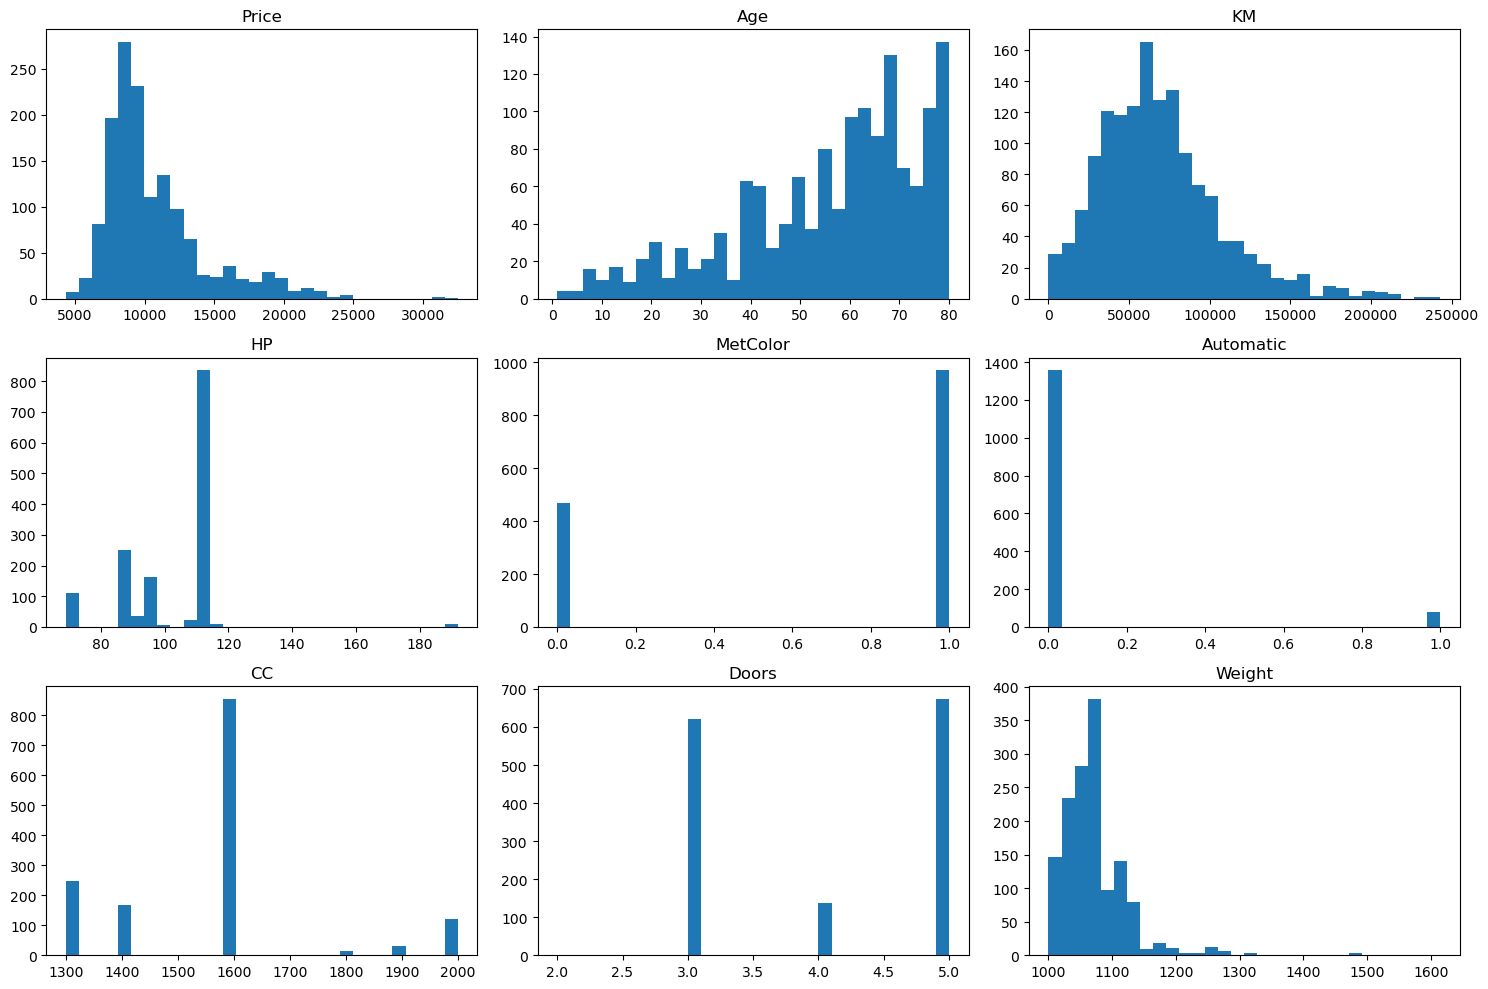

In [ ]:
columns = ['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors','Weight']
num_columns = len(columns)
nrows = (num_columns + 2) // 3
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
axes = axes.flatten()
for i, column in enumerate(columns):
    axes[i].hist(df[column].dropna(), bins=30) # Drop NA values for plotting
    axes[i].set_title(column)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
df.nunique()

Price         236
Age            77
KM           1263
FuelType        3
HP             13
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64

In [ ]:
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
cat_encoded = encoder.fit_transform(df[['FuelType']])
cat_encoded

,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
1431,0.0,0.0,1.0
1432,0.0,0.0,1.0
1433,0.0,0.0,1.0
1434,0.0,0.0,1.0


In [ ]:
df1 = pd.concat([df,cat_encoded],axis=1)
df1.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,Diesel,90.0,1,0,2000,3,1165,0.0,1.0,0.0
1,13750,23,72937,Diesel,90.0,1,0,2000,3,1165,0.0,1.0,0.0
2,13950,24,41711,Diesel,90.0,1,0,2000,3,1165,0.0,1.0,0.0
3,14950,26,48000,Diesel,90.0,0,0,2000,3,1165,0.0,1.0,0.0
4,13750,30,38500,Diesel,90.0,0,0,2000,3,1170,0.0,1.0,0.0


In [ ]:
df1.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight', 'FuelType_CNG', 'FuelType_Diesel',
       'FuelType_Petrol'],
      dtype='object')

In [ ]:
df1.drop('FuelType', axis=1, inplace=True)

In [ ]:
df1.columns

Index(['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'FuelType_CNG', 'FuelType_Diesel', 'FuelType_Petrol'],
      dtype='object')

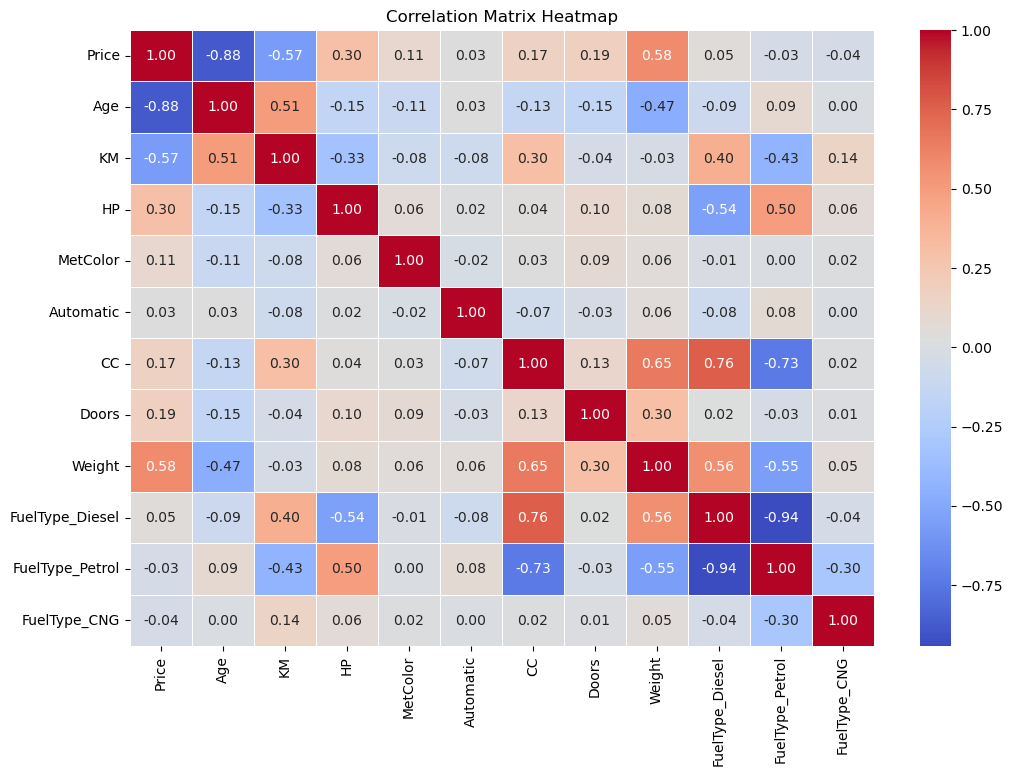

In [ ]:
correlation_matrix = df1[['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic','CC', 'Doors', 'Weight', 'FuelType_Diesel','FuelType_Petrol','FuelType_CNG']].corr()
#print(correlation_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Independent variables (features)
X = df1[['KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors','Weight','FuelType_CNG', 'FuelType_Diesel', 'FuelType_Petrol']]
# Dependent variables (targets)
Y = df1[['Price', 'Age']] # We are predicting both 'Price' and 'Age'

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)

In [ ]:
x_test,x_train,y_test,y_train= train_test_split(X,Y,test_size=0.3)

In [ ]:
lr= LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [ ]:
print(x_test.shape,y_pred.shape)

(1005, 10) (1005, 2)


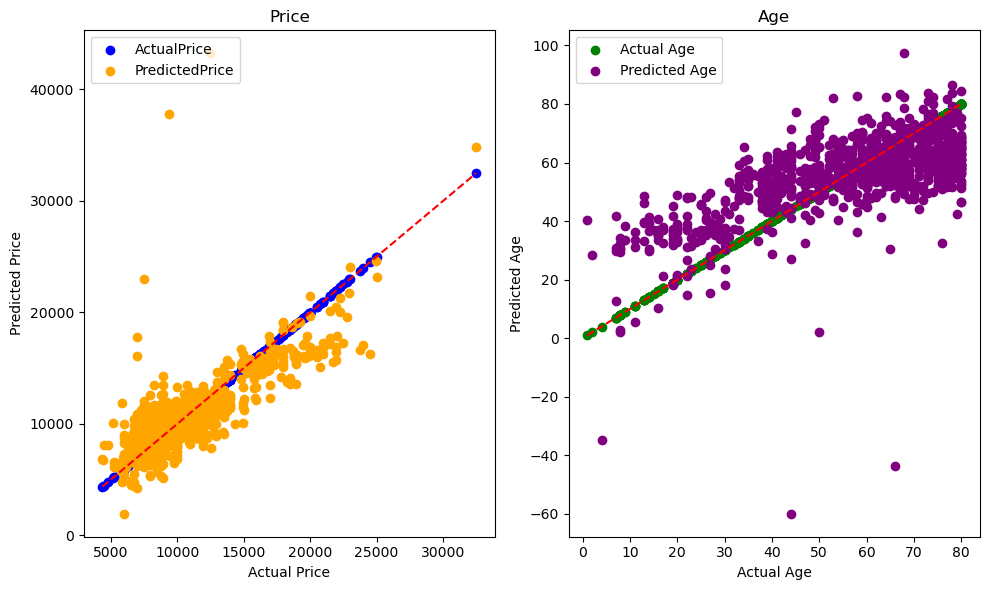

In [ ]:
plt.figure(figsize=(10, 6))
# First subplot for Price
ax1 = plt.subplot(121)
ax1.scatter(y_test['Price'], y_test['Price'], color='blue', label='ActualPrice')
ax1.scatter(y_test['Price'], y_pred[:, 0], color='orange', label='PredictedPrice')
ax1.plot([min(y_test['Price']), max(y_test['Price'])], [min(y_test['Price']),max(y_test['Price'])], color='red', linestyle='--')
ax1.set_xlabel('Actual Price')
ax1.set_ylabel('Predicted Price')
ax1.set_title('Price')
ax1.legend(loc='upper left')

# Second subplot for KM
ax2 = plt.subplot(122)
ax2.scatter(y_test['Age'], y_test['Age'], color='green', label='Actual Age')
ax2.scatter(y_test['Age'], y_pred[:, 1], color='purple', label='Predicted Age')
ax2.plot([min(y_test['Age']), max(y_test['Age'])], [min(y_test['Age']),max(y_test['Age'])], color='red', linestyle='--')
ax2.set_xlabel('Actual Age')
ax2.set_ylabel('Predicted Age')
ax2.set_title('Age')
ax2.legend(loc='upper left')
plt.tight_layout() # Adjust spacing between subplots
plt.show()

In [ ]:
y_pred

array([[10539.94757793,    57.9059353 ],
       [ 9710.05186678,    58.53820293],
       [ 8827.85659712,    64.76218067],
       ...,
       [ 8755.53114662,    62.75267012],
       [ 8657.06932334,    63.04799305],
       [ 8880.17445447,    63.0307501 ]])

In [ ]:
# Calculate metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print(mae,mse,r2)

756.3983921327367 2767798.5316546806 0.5037671728490472


In [ ]:
for i, column in enumerate(y_test.columns):
    mae = metrics.mean_absolute_error(y_test[column], y_pred[:, i])
    mse = metrics.mean_squared_error(y_test[column], y_pred[:, i])
    r2 = metrics.r2_score(y_test[column], y_pred[:, i])
    print(f"Metrics for target {column}:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2}")
    print("--------------------")

Metrics for target Price:
MAE: 1502.1462889558154
MSE: 5535405.769765763
R2 Score: 0.5696987309992887
--------------------
Metrics for target Age:
MAE: 10.650495309657055
MSE: 191.2935435972792
R2 Score: 0.43783561469880505
--------------------
